## Imports

In [1]:
import sys
sys.path.append( '../utilitaries' )
sys.path.append( '../generate_data' )

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KDTree
from analog_utilitaries import sep_traj, locdim
from generate_lorenz import RK4, l63

## Generating data

In [2]:
x0 = np.array([1,1,1])
dt = 0.01

In [3]:
for i in range(2000):
    x0 = RK4(x0, dt, l63)

In [4]:
N = 10**5
X = np.full((N,3), np.nan)
X[0] = x0
for i in range(N-1):
    X[i+1] = RK4(X[i], dt, l63)

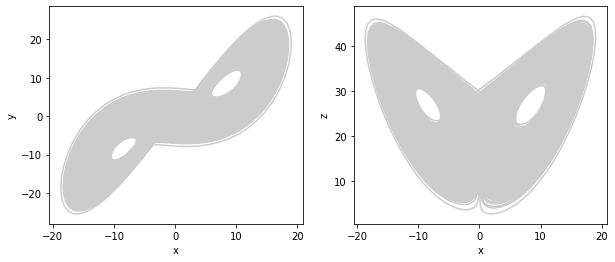

In [5]:
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.plot(X[:,0],X[:,1],'k',alpha=.2)
plt.xlabel('x'); plt.ylabel('y')
plt.subplot(122)
plt.plot(X[:,0],X[:,2],'k',alpha=.2)
plt.xlabel('x'); plt.ylabel('z')
plt.show()

## Estimating dimension

Find analogues first.

In [6]:
kdt = KDTree(X)

In [7]:
K = int(N*.001)

In [8]:
dist, ind = kdt.query(X, K+1)
dist, ind = dist[:,1:], ind[:,1:] # leave-out first 'analog' which is just the query itself

Now estimate dimension.

In [14]:
dim = locdim(dist)

In [21]:
np.mean(dim)

2.1119776832183743

Theory says that taking the average of local dimensions should tend to 2.06. Not bad.

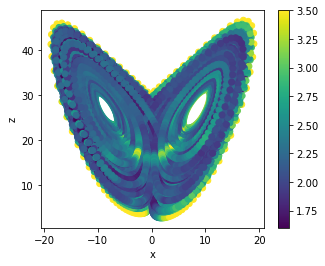

In [18]:
plt.figure(figsize=(5,4))
im = plt.scatter(X[:,0], X[:,2], c=dim, vmin=1.6, vmax=3.5)
plt.colorbar(im)
plt.xlabel('x'); plt.ylabel('z')
plt.show()

Dimension is overestimated where there is not enough data: we should find a local dimension close to 2 at the wing's edges, but we find very high values due to this misestimation phenomenon.

## Todo: make use of sep_traj()